In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import Tensor, LongTensor, FloatTensor
from torch.autograd import Variable

import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook

In [3]:
df = pd.read_pickle("data/full_data.pkl")
df

,ts,user,x_coordinate,y_coordinate,color,pixel,local_agreement,previous_agreement,previous_user
13216722,1490918688000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,505,510,1,511015,0.000,0.000000,None
15577615,1490918728000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,490,504,1,504994,0.000,0.000000,None
5985698,1490918781000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,518,498,0,499016,0.000,0.000000,None
16342824,1490919337000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,495,11,495969,0.000,0.000000,None
5693574,1490919349000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,477,495,11,495972,0.000,0.000000,None
9251462,1490919361000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,472,496,11,496968,0.000,0.000000,None
2145079,1490919379000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,473,497,11,497970,1.000,0.000000,None
966759,1490919398000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,498,11,498972,1.000,1.000000,None
4497938,1490919410000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,475,498,11,498973,1.000,1.000000,None
13970911,1490919426000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,476,498,11,498974,1.000,1.000000,None


In [4]:
df_end = df.tail(int(2e6)).copy()

In [5]:
active_set = df_end[df_end.groupby('user').user.transform('size') > 4].copy()

In [3]:
active_user_set = set(active_set.user.unique()).union(set(active_set.previous_user.unique()))
nb_users = len(active_user_set)

In [4]:
user_to_id = dict(zip(list(active_user_set), np.arange(nb_users)))

In [5]:
active_set['user_id'] = active_set['user'].map(user_to_id).astype(int)
active_set['previous_user_id'] = active_set['previous_user'].map(user_to_id).fillna(-1).astype(int)

In [6]:
nb_users

310596

In [7]:
active_set.user.nunique()

101811

In [8]:
active_set.previous_user.nunique()

310279

In [9]:
cumcount = active_set.groupby('user').cumcount(ascending=False)
train_set = active_set[cumcount > 1]
validation_set = active_set[cumcount == 1]
test_set = active_set[cumcount == 0]

In [10]:
train_input = Variable(torch.LongTensor(train_set[['user_id','previous_user_id']].values))
validation_input = Variable(torch.LongTensor(validation_set[['user_id','previous_user_id']].values))
test_input = Variable(torch.LongTensor(test_set[['user_id','previous_user_id']].values))

In [11]:
train_target = Variable(torch.FloatTensor(train_set.local_agreement.values))
validation_target = Variable(torch.FloatTensor(validation_set.local_agreement.values))
test_target = Variable(torch.FloatTensor(test_set.local_agreement.values))

In [19]:
avg_local = train_set.groupby('user_id').local_agreement.mean()

In [22]:
# baseline rmse
np.sqrt(np.square(test_set.local_agreement.values - avg_local[test_set.user_id].values).mean())

0.3235874904960119

In [23]:
def train_model(model, nb_epochs = 50, learning_rate = 0.75, mini_batch_size = 64, opt = optim.SGD):
    criterion = nn.MSELoss()
    optimizer = opt(model.parameters(), lr = learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
    
    best_error = validation_input.size(0)+1
    res = []
    
    for e in tqdm_notebook(range(nb_epochs)):
        sum_loss = 0
        
        for b in tqdm_notebook(range(0, train_input.size(0), mini_batch_size)):
            if (b+mini_batch_size) > train_input.size(0):
                output = model(train_input[b:])
                loss = criterion(output, train_target[b:])
            else:
                output = model(train_input.narrow(0, b, mini_batch_size))
                loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
        
            sum_loss = sum_loss + loss.data[0]
            model.zero_grad()
            loss.backward()
            optimizer.step()

        train_error = np.sqrt((model(train_input).squeeze() - train_target).data.pow(2).mean())
        validation_error = np.sqrt((model(validation_input).squeeze() - validation_target).data.pow(2).mean())
        scheduler.step(validation_error)
        
        print("  Epoch {:>3} : loss = {:1.8f} | training error = {:>4} | validation error = {:>4}".format(e+1, sum_loss, train_error, validation_error))
        res.append(validation_error)
        
        if (validation_error < best_error) or ( (validation_error == best_error) and ((e+1) < best_epoch) ):
            best_error = validation_error
            best_epoch = e+1
            
    return [ res, best_error, best_epoch ]

## Simple model (only biases)

In [24]:
class Simple_Embedding(nn.Module):
    def __init__(self, n_users):
        super(Simple_Embedding, self).__init__()
        self.user_bias = nn.Embedding(n_users,1)
        self.user_bias.weight.data.normal_(0.5,0.5)

    def forward(self, users):
        return self.user_bias(users[:,0])

In [25]:
simple_embedding = Simple_Embedding(nb_users)

simple_res = train_model(simple_embedding, nb_epochs=200, mini_batch_size=256, learning_rate=0.9)

  Epoch   1 : loss = 1749.45596620 | training error = 0.521007462883823 | validation error = 0.56383668862079


  Epoch   2 : loss = 1366.27786447 | training error = 0.46911296496028915 | validation error = 0.533704557404938


  Epoch   3 : loss = 1137.03493439 | training error = 0.43320170566567745 | validation error = 0.5096040174304804


  Epoch   4 : loss = 986.76639669 | training error = 0.40686529534677685 | validation error = 0.48962081709854544


  Epoch   5 : loss = 881.09811167 | training error = 0.3866634967691235 | validation error = 0.4726403145206681


  Epoch   6 : loss = 802.84731320 | training error = 0.3706430243294449 | validation error = 0.45796042610856563


  Epoch   7 : loss = 742.65802643 | training error = 0.35762092556688285 | validation error = 0.4451079095571494


  Epoch   8 : loss = 695.02505919 | training error = 0.3468353483509994 | validation error = 0.4337460024476181


  Epoch   9 : loss = 656.48990315 | training error = 0.3377692286008644 | validation error = 0.42362480250021


  Epoch  10 : loss = 624.76202022 | training error = 0.3300565222189029 | validation error = 0.41455275945176556


  Epoch  11 : loss = 598.25943404 | training error = 0.3234293279366782 | validation error = 0.4063792651495783


  Epoch  12 : loss = 575.85237283 | training error = 0.31768632114113265 | validation error = 0.39898344898417704


  Epoch  13 : loss = 556.71177122 | training error = 0.312672930332599 | validation error = 0.39226664790766075


  Epoch  14 : loss = 540.21536345 | training error = 0.30826834783343354 | validation error = 0.3861471700190994


  Epoch  15 : loss = 525.88707675 | training error = 0.30437671590364646 | validation error = 0.3805565429153448


  Epoch  16 : loss = 513.35661689 | training error = 0.30092097094320525 | validation error = 0.37543676172139273


  Epoch  17 : loss = 502.33179616 | training error = 0.2978384434754005 | validation error = 0.37073823203972855


  Epoch  18 : loss = 492.57907579 | training error = 0.29507764696171473 | validation error = 0.3664182017573336


  Epoch  19 : loss = 483.90967071 | training error = 0.292595894680004 | validation error = 0.3624395483035007


  Epoch  20 : loss = 476.16938239 | training error = 0.29035750362835355 | validation error = 0.3587698290186807


  Epoch  21 : loss = 469.23112690 | training error = 0.2883324223134376 | validation error = 0.35538052594924335


  Epoch  22 : loss = 462.98924746 | training error = 0.2864951697886711 | validation error = 0.35224644095097174


  Epoch  23 : loss = 457.35524195 | training error = 0.28482400598135565 | validation error = 0.3493452044697812


  Epoch  24 : loss = 452.25445985 | training error = 0.283300277067116 | validation error = 0.3466568745398603


  Epoch  25 : loss = 447.62351601 | training error = 0.2819078928105062 | validation error = 0.3441636040629388


  Epoch  26 : loss = 443.40829122 | training error = 0.28063290700386373 | validation error = 0.34184936648183095


  Epoch  27 : loss = 439.56229824 | training error = 0.2794631775689839 | validation error = 0.3396997226720343


  Epoch  28 : loss = 436.04541014 | training error = 0.2783880887580816 | validation error = 0.33770162830361095


  Epoch  29 : loss = 432.82283773 | training error = 0.27739832321265334 | validation error = 0.3358432650816979


  Epoch  30 : loss = 429.86427208 | training error = 0.27648567362067805 | validation error = 0.3341139023498934


  Epoch  31 : loss = 427.14321509 | training error = 0.2756428855412272 | validation error = 0.33250377327490727


  Epoch  32 : loss = 424.63638462 | training error = 0.2748635266447027 | validation error = 0.331003970637748


  Epoch  33 : loss = 422.32327848 | training error = 0.2741418761386453 | validation error = 0.3296063555412904


  Epoch  34 : loss = 420.18575962 | training error = 0.2734728319106243 | validation error = 0.3283034790837425


  Epoch  35 : loss = 418.20775440 | training error = 0.27285183140231734 | validation error = 0.32708851101720116


  Epoch  36 : loss = 416.37495174 | training error = 0.2722747842106037 | validation error = 0.32595517996438883


  Epoch  37 : loss = 414.67458847 | training error = 0.27173801467595315 | validation error = 0.32489772009126466


  Epoch  38 : loss = 413.09524926 | training error = 0.27123821216788213 | validation error = 0.3239108223509623


  Epoch  39 : loss = 411.62669225 | training error = 0.27077238863881087 | validation error = 0.3229895922903545


  Epoch  40 : loss = 410.25971624 | training error = 0.2703378415844003 | validation error = 0.3221295137270423


  Epoch  41 : loss = 408.98602493 | training error = 0.2699321221027921 | validation error = 0.3213264132142538


  Epoch  42 : loss = 407.79813139 | training error = 0.26955300686661304 | validation error = 0.32057643213515574


  Epoch  43 : loss = 406.68926360 | training error = 0.26919847403905267 | validation error = 0.31987599755103757


  Epoch  44 : loss = 405.65327443 | training error = 0.268866681719344 | validation error = 0.3192217995264491


  Epoch  45 : loss = 404.68458929 | training error = 0.26855594932274846 | validation error = 0.3186107687377768


  Epoch  46 : loss = 403.77813037 | training error = 0.2682647411750193 | validation error = 0.31804005648422534


  Epoch  47 : loss = 402.92927398 | training error = 0.267991651893985 | validation error = 0.317507016858997


  Epoch  48 : loss = 402.13379545 | training error = 0.26773539345634983 | validation error = 0.31700919088395846


  Epoch  49 : loss = 401.38783541 | training error = 0.2674947840321947 | validation error = 0.3165442918704067


  Epoch  50 : loss = 400.68785833 | training error = 0.26726873765613596 | validation error = 0.3161101908815038


  Epoch  51 : loss = 400.03062310 | training error = 0.26705625532388294 | validation error = 0.3157049058163336


  Epoch  52 : loss = 399.41315439 | training error = 0.26685641671494353 | validation error = 0.3153265896230112


  Epoch  53 : loss = 398.83271440 | training error = 0.26666837344244504 | validation error = 0.3149735205647454


  Epoch  54 : loss = 398.28678646 | training error = 0.26649134224265864 | validation error = 0.314644092018674


  Epoch  55 : loss = 397.77304979 | training error = 0.26632459927215124 | validation error = 0.31433680498217736


  Epoch  56 : loss = 397.28936209 | training error = 0.26616747504578414 | validation error = 0.31405025999240865


  Epoch  57 : loss = 396.83374751 | training error = 0.2660193496760993 | validation error = 0.3137831492552015


  Epoch  58 : loss = 396.40437478 | training error = 0.2658796485947056 | validation error = 0.31353425080205855


  Epoch  59 : loss = 395.99955317 | training error = 0.26574783890985915 | validation error = 0.3133024218915074


  Epoch  60 : loss = 395.61771083 | training error = 0.26562342586307613 | validation error = 0.3130865941878683


  Epoch  61 : loss = 395.25740020 | training error = 0.26550594966540003 | validation error = 0.312885767331078


  Epoch  62 : loss = 394.91726625 | training error = 0.26539498278275275 | validation error = 0.31269900534275585


  Epoch  63 : loss = 394.59605645 | training error = 0.2652901273307635 | validation error = 0.3125254315294024


  Epoch  64 : loss = 394.29260310 | training error = 0.2651910126846971 | validation error = 0.31236422538333436


  Epoch  65 : loss = 394.00582623 | training error = 0.2650972934804521 | validation error = 0.31221461717209653


  Epoch  66 : loss = 393.73471398 | training error = 0.26500864747252517 | validation error = 0.31207588595216423


  Epoch  67 : loss = 393.47832162 | training error = 0.26492477398066205 | validation error = 0.311947356091981


  Epoch  68 : loss = 393.23577433 | training error = 0.26484539222093895 | validation error = 0.3118283933872516


  Epoch  69 : loss = 393.00625053 | training error = 0.2647702396600576 | validation error = 0.31171840306568704


  Epoch  70 : loss = 392.78898543 | training error = 0.26469907093548073 | validation error = 0.3116168275018099


  Epoch  71 : loss = 392.58326829 | training error = 0.2646316564018029 | validation error = 0.3115231428377094


  Epoch  72 : loss = 392.38842616 | training error = 0.2645677810055469 | validation error = 0.3114368576474494


  Epoch  73 : loss = 392.20383130 | training error = 0.2645072433643423 | validation error = 0.3113575099856879


  Epoch  74 : loss = 392.02890290 | training error = 0.26444985478131433 | validation error = 0.31128466675971944


  Epoch  75 : loss = 391.86308901 | training error = 0.2643954381743806 | validation error = 0.31121792089099354


  Epoch  76 : loss = 391.70587447 | training error = 0.26434382749683194 | validation error = 0.3111568900010102


  Epoch  77 : loss = 391.55677957 | training error = 0.2642948668777042 | validation error = 0.3111012142270509


  Epoch  78 : loss = 391.41535245 | training error = 0.26424840989030235 | validation error = 0.3110505564653912


  Epoch  79 : loss = 391.28116458 | training error = 0.2642043189809697 | validation error = 0.31100459901160915


  Epoch  80 : loss = 391.15382146 | training error = 0.26416246489851225 | validation error = 0.3109630435180951


  Epoch  81 : loss = 391.03294079 | training error = 0.2641227259897219 | validation error = 0.3109256094165442


  Epoch  82 : loss = 390.91818099 | training error = 0.26408498788191953 | validation error = 0.31089203275775457


  Epoch  83 : loss = 390.80919948 | training error = 0.2640491429129639 | validation error = 0.31086206597243


  Epoch  84 : loss = 390.70569068 | training error = 0.2640150897276933 | validation error = 0.31083547580480814


  Epoch  85 : loss = 390.60736024 | training error = 0.26398273277786255 | validation error = 0.3108120428254213


  Epoch  86 : loss = 390.51393127 | training error = 0.26395198217955274 | validation error = 0.31079156063928043


  Epoch  87 : loss = 390.42514426 | training error = 0.2639227530576328 | validation error = 0.31077383534008407


  Epoch  88 : loss = 390.34074994 | training error = 0.2638949654000715 | validation error = 0.31075868443898025


  Epoch  89 : loss = 390.26052089 | training error = 0.26386854382462377 | validation error = 0.3107459359175689


  Epoch  90 : loss = 390.18423761 | training error = 0.26384341713477494 | validation error = 0.31073542895074924


  Epoch  91 : loss = 390.11169415 | training error = 0.2638195180979622 | validation error = 0.31072701115289325


  Epoch  92 : loss = 390.04269502 | training error = 0.2637967832939505 | validation error = 0.3107205397572339


  Epoch  93 : loss = 389.97705907 | training error = 0.2637751527884544 | validation error = 0.3107158801775708


  Epoch  94 : loss = 389.91461198 | training error = 0.2637545699204483 | validation error = 0.3107129062323721


  Epoch  95 : loss = 389.85519112 | training error = 0.26373498121357697 | validation error = 0.310711499074615


  Epoch  96 : loss = 389.79863719 | training error = 0.26371633606053996 | validation error = 0.31071154652674216


  Epoch  97 : loss = 389.74481115 | training error = 0.26369858661918 | validation error = 0.3107129437098496


  Epoch  98 : loss = 389.69356807 | training error = 0.26368168765947414 | validation error = 0.31071559120977416


  Epoch  99 : loss = 389.64478255 | training error = 0.2636655963063551 | validation error = 0.31071939624830086


  Epoch 100 : loss = 389.59832588 | training error = 0.2636502721105127 | validation error = 0.31072427175446987


  Epoch 101 : loss = 389.55408412 | training error = 0.26363567667036625 | validation error = 0.31073013495212365


  Epoch 102 : loss = 389.51194733 | training error = 0.26362177368854856 | validation error = 0.3107369088991079


  Epoch 103 : loss = 387.38850670 | training error = 0.26361459825019173 | validation error = 0.3107486240204465


  Epoch 104 : loss = 387.36824969 | training error = 0.2636079109356183 | validation error = 0.31076001629834304


  Epoch 105 : loss = 387.34935663 | training error = 0.263601668350774 | validation error = 0.310771096424311


  Epoch 106 : loss = 387.33170622 | training error = 0.2635958309418797 | validation error = 0.3107818735324703


  Epoch 107 : loss = 387.31519665 | training error = 0.2635903630897839 | validation error = 0.31079235836668206


  Epoch 108 : loss = 387.29971500 | training error = 0.26358523258758 | validation error = 0.3108025597281437


  Epoch 109 : loss = 387.28517665 | training error = 0.26358041004001614 | validation error = 0.3108124873431251


  Epoch 110 : loss = 387.27150281 | training error = 0.2635758689528716 | validation error = 0.31082215073971226


  Epoch 111 : loss = 387.25861519 | training error = 0.2635715852560257 | validation error = 0.31083155863782763


  Epoch 112 : loss = 387.24644802 | training error = 0.2635675371540057 | validation error = 0.310840719923972


  Epoch 113 : loss = 387.23494405 | training error = 0.2635637048449046 | validation error = 0.310849643092083


  Epoch 114 : loss = 386.98735750 | training error = 0.26356329348497975 | validation error = 0.31085063538621294


  Epoch 115 : loss = 386.98616234 | training error = 0.26356288459576693 | validation error = 0.31085162499791


  Epoch 116 : loss = 386.98497158 | training error = 0.26356247809907773 | validation error = 0.31085261191998054


  Epoch 117 : loss = 386.98378896 | training error = 0.26356207404508486 | validation error = 0.3108535963084776


  Epoch 118 : loss = 386.98261311 | training error = 0.26356167238466843 | validation error = 0.31085457831538804


  Epoch 119 : loss = 386.98144288 | training error = 0.26356127306912613 | validation error = 0.31085555761838424


  Epoch 120 : loss = 386.98028100 | training error = 0.26356087607115614 | validation error = 0.3108565342959773


  Epoch 121 : loss = 386.97912700 | training error = 0.26356048141840616 | validation error = 0.31085750835743126


  Epoch 122 : loss = 386.97798021 | training error = 0.26356008901723327 | validation error = 0.3108584797730743


  Epoch 123 : loss = 386.97683510 | training error = 0.2635596989401341 | validation error = 0.31085944876623556


  Epoch 124 : loss = 386.97569899 | training error = 0.26355931105324587 | validation error = 0.3108604150342962


  Epoch 125 : loss = 386.95061825 | training error = 0.263559271960948 | validation error = 0.31086051283474425


  Epoch 126 : loss = 386.95050328 | training error = 0.26355923286594074 | validation error = 0.31086061063539133


  Epoch 127 : loss = 386.95038886 | training error = 0.2635591937893391 | validation error = 0.3108607082161855


  Epoch 128 : loss = 386.95027594 | training error = 0.26355915470586433 | validation error = 0.31086080596384563


  Epoch 129 : loss = 386.95016065 | training error = 0.26355911569852875 | validation error = 0.31086090370821123


  Epoch 130 : loss = 386.95004526 | training error = 0.2635590767241828 | validation error = 0.3108610013132011


  Epoch 131 : loss = 386.94993347 | training error = 0.2635590377009296 | validation error = 0.31086109886846086


  Epoch 132 : loss = 386.94981904 | training error = 0.2635589987402323 | validation error = 0.3108611964471092


  Epoch 133 : loss = 386.94970649 | training error = 0.2635589598337185 | validation error = 0.3108612940153118


  Epoch 134 : loss = 386.94959188 | training error = 0.2635589209789423 | validation error = 0.3108613915297686


  Epoch 135 : loss = 386.94947959 | training error = 0.26355888209611417 | validation error = 0.3108614889169287


  Epoch 136 : loss = 386.94696363 | training error = 0.26355887817471335 | validation error = 0.310861498781142


  Epoch 137 : loss = 386.94695038 | training error = 0.2635588742832765 | validation error = 0.31086150864560824


  Epoch 138 : loss = 386.94693939 | training error = 0.26355887034986314 | validation error = 0.3108615185197102


  Epoch 139 : loss = 386.94693066 | training error = 0.26355886648363286 | validation error = 0.31086152829192487


  Epoch 140 : loss = 386.94692092 | training error = 0.263558862570238 | validation error = 0.3108615381793377


  Epoch 141 : loss = 386.94690711 | training error = 0.263558858677104 | validation error = 0.3108615480837065


  Epoch 142 : loss = 386.94689506 | training error = 0.2635588547435139 | validation error = 0.31086155798872905


  Epoch 143 : loss = 386.94688425 | training error = 0.26355885087647896 | validation error = 0.31086156778308555


  Epoch 144 : loss = 386.94687279 | training error = 0.2635588469784234 | validation error = 0.3108615776391221


  Epoch 145 : loss = 386.94686130 | training error = 0.2635588430649744 | validation error = 0.31086158751244536


  Epoch 146 : loss = 386.94684966 | training error = 0.26355883914987505 | validation error = 0.3108615974000643


  Epoch 147 : loss = 386.94659681 | training error = 0.263558838406019 | validation error = 0.3108615961553539


  Epoch 148 : loss = 386.94659500 | training error = 0.2635588377414691 | validation error = 0.310861594979911


  Epoch 149 : loss = 386.94659238 | training error = 0.26355883699720856 | validation error = 0.310861593652142


  Epoch 150 : loss = 386.94659135 | training error = 0.263558836269919 | validation error = 0.3108615924025889


  Epoch 151 : loss = 386.94658850 | training error = 0.2635588355499414 | validation error = 0.3108615911753195


  Epoch 152 : loss = 386.94658749 | training error = 0.26355883484955045 | validation error = 0.31086158990721213


  Epoch 153 : loss = 386.94658425 | training error = 0.26355883414383635 | validation error = 0.31086158866740626


  Epoch 154 : loss = 386.94658394 | training error = 0.26355883338923913 | validation error = 0.31086158743930264


  Epoch 155 : loss = 386.94658238 | training error = 0.26355883266006425 | validation error = 0.3108615861337335


  Epoch 156 : loss = 386.94657992 | training error = 0.2635588319774184 | validation error = 0.3108615849452986


  Epoch 157 : loss = 386.94657941 | training error = 0.2635588312410221 | validation error = 0.31086158366135047


  Epoch 158 : loss = 386.94654999 | training error = 0.2635588312365457 | validation error = 0.3108615836479952


  Epoch 159 : loss = 386.94654997 | training error = 0.2635588312365597 | validation error = 0.3108615836415862


  Epoch 160 : loss = 386.94655007 | training error = 0.2635588312382289 | validation error = 0.3108615836266859


  Epoch 161 : loss = 386.94655025 | training error = 0.2635588312396661 | validation error = 0.3108615836165212


  Epoch 162 : loss = 386.94655021 | training error = 0.26355883123992524 | validation error = 0.31086158360313654


  Epoch 163 : loss = 386.94655037 | training error = 0.26355883123918655 | validation error = 0.3108615835914212


  Epoch 164 : loss = 386.94655034 | training error = 0.2635588312424888 | validation error = 0.3108615835805383


  Epoch 165 : loss = 386.94655026 | training error = 0.2635588312429611 | validation error = 0.3108615835669784


  Epoch 166 : loss = 386.94655025 | training error = 0.26355883123937335 | validation error = 0.31086158356046417


  Epoch 167 : loss = 386.94655030 | training error = 0.2635588312371683 | validation error = 0.3108615835469658


  Epoch 168 : loss = 386.94655037 | training error = 0.2635588312385662 | validation error = 0.31086158353059395


  Epoch 169 : loss = 386.94655035 | training error = 0.26355883123856916 | validation error = 0.31086158353059445


  Epoch 170 : loss = 386.94655035 | training error = 0.26355883123857105 | validation error = 0.31086158353059473


  Epoch 171 : loss = 386.94655035 | training error = 0.2635588312385737 | validation error = 0.31086158353059534


  Epoch 172 : loss = 386.94655035 | training error = 0.2635588312385765 | validation error = 0.3108615835305958


  Epoch 173 : loss = 386.94655035 | training error = 0.26355883123857876 | validation error = 0.3108615835305961


  Epoch 174 : loss = 386.94655035 | training error = 0.2635588312385812 | validation error = 0.3108615835305966


  Epoch 175 : loss = 386.94655035 | training error = 0.26355883123858403 | validation error = 0.3108615835305971


  Epoch 176 : loss = 386.94655035 | training error = 0.2635588312385859 | validation error = 0.3108615835305974


  Epoch 177 : loss = 386.94655035 | training error = 0.2635588312385885 | validation error = 0.3108615835305979


  Epoch 178 : loss = 386.94655035 | training error = 0.2635588312385917 | validation error = 0.31086158353059834


  Epoch 179 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 180 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 181 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 182 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 183 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 184 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 185 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 186 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 187 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 188 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 189 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 190 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 191 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 192 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 193 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 194 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 195 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 196 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 197 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 198 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 199 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884


  Epoch 200 : loss = 386.94655035 | training error = 0.2635588312385938 | validation error = 0.31086158353059884



In [26]:
#rmse
np.sqrt((simple_embedding(test_input).squeeze() - test_target).data.pow(2).mean())

0.3217737426873887

In [28]:
user_biases = simple_embedding.user_bias.weight.data[LongTensor(avg_local.index.astype(int).values)].squeeze()

In [29]:
# average difference between mean local agreement of the user and its scalar embedding
(Tensor(avg_local.values) - user_biases).mean()

-0.0007190167199754479

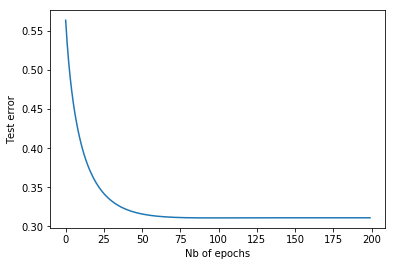

In [27]:
plt.figure()
plt.plot(range(len(simple_res[0])),simple_res[0])
plt.xlabel("Nb of epochs")
plt.ylabel("Test error")
plt.savefig("figures/simple_model_results.pdf")
plt.show()

## User embeddings dot product

In [31]:
class Dot_Embedding(nn.Module):
    def __init__(self, n_users, K=10):
        super(Dot_Embedding, self).__init__()
        self.user_embs = nn.Embedding(n_users,K)
        self.user_embs.weight.data.normal_(0.5,0.5)
        self.user_bias = nn.Embedding(n_users,1)
        self.user_bias.weight.data.normal_(0.5,0.5)
        self.sig = nn.Sigmoid()

    def forward(self, users):
        new_users = self.user_embs(users[:,0])
        previous_users = self.user_embs(users[:,1])
        
        res = (new_users*previous_users).sum(1)
        res += self.user_bias(users[:,0]).squeeze()
        return self.sig(res)

In [32]:
user_dot = Dot_Embedding(nb_users)

In [33]:
#best user dot
dot_res = train_model(user_dot)

  Epoch   1 : loss = 7664.91569020 | training error = 0.5803870251282442 | validation error = 0.5646358393527571


  Epoch   2 : loss = 7356.68331286 | training error = 0.5676625439352966 | validation error = 0.5587051816785399


  Epoch   3 : loss = 7024.52414398 | training error = 0.5541497131379751 | validation error = 0.5525097472687205


  Epoch   4 : loss = 6689.44578382 | training error = 0.5405422827032684 | validation error = 0.5462538851968335


  Epoch   5 : loss = 6365.59461780 | training error = 0.5272678012347257 | validation error = 0.5401058085146602


  Epoch   6 : loss = 6060.88264874 | training error = 0.5146133862689176 | validation error = 0.5341669343581749


  Epoch   7 : loss = 5779.65824547 | training error = 0.5027367117485171 | validation error = 0.5284873900455569


  Epoch   8 : loss = 5522.69724393 | training error = 0.4916662229519279 | validation error = 0.5230879491010137


  Epoch   9 : loss = 5288.74676207 | training error = 0.4813767216489812 | validation error = 0.5179735153058584


  Epoch  10 : loss = 5075.99079438 | training error = 0.4718254802337884 | validation error = 0.513134945214732


  Epoch  11 : loss = 4882.23118373 | training error = 0.4629426803127171 | validation error = 0.5085505690609725


  Epoch  12 : loss = 4705.14168901 | training error = 0.454657223560245 | validation error = 0.5041989096618543


  Epoch  13 : loss = 4542.68934062 | training error = 0.4469100367972588 | validation error = 0.5000650214685599


  Epoch  14 : loss = 4393.17770232 | training error = 0.43964844395841024 | validation error = 0.4961343094125613


  Epoch  15 : loss = 4255.15908575 | training error = 0.43282911151734055 | validation error = 0.49239399425000036


  Epoch  16 : loss = 4127.40436678 | training error = 0.42641020185752543 | validation error = 0.48883222887751704


  Epoch  17 : loss = 4008.75450828 | training error = 0.4203510974466863 | validation error = 0.48543686472441006


  Epoch  18 : loss = 3898.19179571 | training error = 0.41461705215863875 | validation error = 0.4821964531181145


  Epoch  19 : loss = 3794.87148316 | training error = 0.4091799137660413 | validation error = 0.4791007367798712


  Epoch  20 : loss = 3698.09145794 | training error = 0.4040151392239151 | validation error = 0.47614013310279335


  Epoch  21 : loss = 3607.22760681 | training error = 0.39910003726103427 | validation error = 0.4733051565154224


  Epoch  22 : loss = 3521.72530503 | training error = 0.39441431068769883 | validation error = 0.4705868042649938


  Epoch  23 : loss = 3441.09377467 | training error = 0.38993948908410664 | validation error = 0.46797689401117104


  Epoch  24 : loss = 3364.89223912 | training error = 0.38565850965469894 | validation error = 0.46546803155833844


  Epoch  25 : loss = 3292.72177814 | training error = 0.3815555183804747 | validation error = 0.4630534735637539


  Epoch  26 : loss = 3224.22075390 | training error = 0.3776159388600566 | validation error = 0.4607270844734518


  Epoch  27 : loss = 3159.06663531 | training error = 0.37382682262634914 | validation error = 0.45848339601484445


  Epoch  28 : loss = 3096.97837402 | training error = 0.3701769950574184 | validation error = 0.4563176653082033


  Epoch  29 : loss = 3037.71469573 | training error = 0.366657006158243 | validation error = 0.4542258587098599


  Epoch  30 : loss = 2981.07083755 | training error = 0.36325905271791487 | validation error = 0.4522045461092274


  Epoch  31 : loss = 2926.87449454 | training error = 0.35997671385729346 | validation error = 0.4502507186530416


  Epoch  32 : loss = 2874.97656878 | training error = 0.3568042295233975 | validation error = 0.44836154945321627


  Epoch  33 : loss = 2825.23771803 | training error = 0.3537358129863063 | validation error = 0.44653421406833615


  Epoch  34 : loss = 2777.52221991 | training error = 0.3507656661680885 | validation error = 0.44476585020657533


  Epoch  35 : loss = 2731.70112573 | training error = 0.3478883005578209 | validation error = 0.443053645939705


  Epoch  36 : loss = 2687.65611427 | training error = 0.3450987322706779 | validation error = 0.4413949843486402


  Epoch  37 : loss = 2645.28045913 | training error = 0.3423924622586607 | validation error = 0.4397875281338671


  Epoch  38 : loss = 2604.47683854 | training error = 0.33976527704729304 | validation error = 0.4382291519863233


  Epoch  39 : loss = 2565.15416303 | training error = 0.33721313312234996 | validation error = 0.4367178123660898


  Epoch  40 : loss = 2527.22701207 | training error = 0.33473223769683014 | validation error = 0.43525151329761697


  Epoch  41 : loss = 2490.61697458 | training error = 0.33231915832391934 | validation error = 0.43382838816795943


  Epoch  42 : loss = 2455.25345762 | training error = 0.32997084894164885 | validation error = 0.43244678780218104


  Epoch  43 : loss = 2421.07302797 | training error = 0.3276845723929124 | validation error = 0.4311052820505472


  Epoch  44 : loss = 2388.01768298 | training error = 0.32545778089352195 | validation error = 0.42980256311968756


  Epoch  45 : loss = 2356.03303070 | training error = 0.32328802213401314 | validation error = 0.4285373259228408


  Epoch  46 : loss = 2325.06708312 | training error = 0.3211728813620686 | validation error = 0.4273082189688579


  Epoch  47 : loss = 2295.06957696 | training error = 0.31910996418536774 | validation error = 0.42611386367256815


  Epoch  48 : loss = 2265.99201904 | training error = 0.3170969367398428 | validation error = 0.42495290107244377


  Epoch  49 : loss = 2237.78842497 | training error = 0.3151315940272002 | validation error = 0.42382403364272186


  Epoch  50 : loss = 2210.41610680 | training error = 0.3132119081683217 | validation error = 0.4227260435641895



In [35]:
with open("results/best_user_dot.pkl", "wb") as f:
    pickle.dump(dot_res, f)

In [37]:
with open("models/best_user_dot.m", "wb") as f:
    torch.save(user_dot, f)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type Dot_Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [39]:
#rmse
np.sqrt((user_dot(test_input).squeeze() - test_target).data.pow(2).mean())

0.42435217727723273

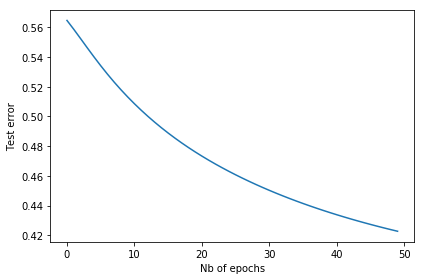

In [42]:
plt.figure()
plt.plot(range(len(dot_res[0])),dot_res[0])
plt.xlabel("Nb of epochs")
plt.ylabel("Test error")
plt.tight_layout()
plt.savefig("figures/user_dot_results.pdf")
plt.show()

## Batch size

In [49]:
batch_sizes = [ 2**n for n in range(7,14,2) ]

batch_results = []
for b_size in tqdm_notebook(batch_sizes):
    print("BATCH SIZE", b_size)
    print("-"*15)
    model = Dot_Embedding(nb_users)
    batch_results.append(train_model(model, nb_epochs=20, mini_batch_size=b_size))
    with open("../models/user_dot_batch_size_"+str(b_size)+".m", "wb") as f:
        torch.save(model, f)
    print("="*30)

BATCH SIZE 128
---------------



  Epoch   1 : loss = 35182.53379250 | training error = 1.0721123414963754 | validation error = 1.5737430312052296


  Epoch   2 : loss = 10309.88753614 | training error = 0.788633873991675 | validation error = 1.3024988143540315


  Epoch   3 : loss = 6207.95364170 | training error = 0.6494445839992602 | validation error = 1.166101229307502


  Epoch   4 : loss = 4409.54351640 | training error = 0.5636122941437196 | validation error = 1.0817215891050727


  Epoch   5 : loss = 3409.27645007 | training error = 0.5046514531994213 | validation error = 1.0239391567910738


  Epoch   6 : loss = 2779.76971414 | training error = 0.46143991909984833 | validation error = 0.9818551049432004


  Epoch   7 : loss = 2351.34387447 | training error = 0.42834222860662924 | validation error = 0.9498932926362682


  Epoch   8 : loss = 2043.26901773 | training error = 0.40215292685596615 | validation error = 0.9248648813088929


  Epoch   9 : loss = 1812.39969663 | training error = 0.3808996642527155 | validation error = 0.9048001866505849


  Epoch  10 : loss = 1633.70387857 | training error = 0.36329743117839264 | validation error = 0.8884115343340903


  Epoch  11 : loss = 1491.73460691 | training error = 0.3484716060475588 | validation error = 0.8748195458571072


  Epoch  12 : loss = 1376.48718232 | training error = 0.33580582766822376 | validation error = 0.8634024504814086


  Epoch  13 : loss = 1281.22266612 | training error = 0.32485317978299727 | validation error = 0.8537079883114329


  Epoch  14 : loss = 1201.25167201 | training error = 0.3152817655043632 | validation error = 0.845399329863814


  Epoch  15 : loss = 1133.21984963 | training error = 0.3068400132655744 | validation error = 0.8382205507336355


  Epoch  16 : loss = 1074.67031068 | training error = 0.29933382028763855 | validation error = 0.8319738204318554


  Epoch  17 : loss = 1023.76603876 | training error = 0.2926110712379088 | validation error = 0.8265039146154114


  Epoch  18 : loss = 979.10839328 | training error = 0.28655089551265434 | validation error = 0.821687424378456


  Epoch  19 : loss = 939.61525534 | training error = 0.28105605424428837 | validation error = 0.817425086426186


  Epoch  20 : loss = 904.43731167 | training error = 0.2760474460943057 | validation error = 0.8136362188355468
BATCH SIZE 512
---------------


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type Dot_Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


  Epoch   1 : loss = 15436.11041117 | training error = 1.85451638699637 | validation error = 2.224049916152881


  Epoch   2 : loss = 7761.68336642 | training error = 1.4680332946578807 | validation error = 1.918659260704216


  Epoch   3 : loss = 5258.36145040 | training error = 1.2537422353630467 | validation error = 1.7346223827965757


  Epoch   4 : loss = 3982.59787364 | training error = 1.1118788566008426 | validation error = 1.6069721498668244


  Epoch   5 : loss = 3202.51431839 | training error = 1.008655352337825 | validation error = 1.5114057712944373


  Epoch   6 : loss = 2674.25547463 | training error = 0.929020246432766 | validation error = 1.436309645514198


  Epoch   7 : loss = 2292.27523106 | training error = 0.8650952991037136 | validation error = 1.3752832203865601


  Epoch   8 : loss = 2003.12237601 | training error = 0.8122900073574512 | validation error = 1.3244491020844285


  Epoch   9 : loss = 1776.70317714 | training error = 0.7677165500550143 | validation error = 1.281293669174266


  Epoch  10 : loss = 1594.72578003 | training error = 0.7294506591470008 | validation error = 1.2441018014277505


  Epoch  11 : loss = 1445.40648788 | training error = 0.6961513404133878 | validation error = 1.2116552857952751


  Epoch  12 : loss = 1320.79980477 | training error = 0.6668498887523083 | validation error = 1.1830603733326261


  Epoch  13 : loss = 1215.34706285 | training error = 0.6408256232096036 | validation error = 1.1576436378018928


  Epoch  14 : loss = 1125.03959261 | training error = 0.6175290455401646 | validation error = 1.1348861827358363


  Epoch  15 : loss = 1046.91182258 | training error = 0.5965323785778542 | validation error = 1.1143805034952723


  Epoch  16 : loss = 978.72186993 | training error = 0.5774966160676217 | validation error = 1.0958013031461693


  Epoch  17 : loss = 918.74300715 | training error = 0.560148928005175 | validation error = 1.0788851813768086


  Epoch  18 : loss = 865.62357607 | training error = 0.5442667678769473 | validation error = 1.0634161876821073


  Epoch  19 : loss = 818.29032635 | training error = 0.5296664449167455 | validation error = 1.0492153131911583


  Epoch  20 : loss = 775.88029261 | training error = 0.5161947394339589 | validation error = 1.036132706029609
BATCH SIZE 2048
---------------


  Epoch   1 : loss = 5292.00395107 | training error = 2.5264115879223503 | validation error = 2.676955808176674


  Epoch   2 : loss = 3956.06767607 | training error = 2.2321794475853194 | validation error = 2.483092986303149


  Epoch   3 : loss = 3169.08522725 | training error = 2.0230327819266707 | validation error = 2.337048387454415


  Epoch   4 : loss = 2647.09649348 | training error = 1.8643306306869665 | validation error = 2.221088243158919


  Epoch   5 : loss = 2274.79827714 | training error = 1.7385176852584068 | validation error = 2.1256992974212636


  Epoch   6 : loss = 1995.55116487 | training error = 1.6355546386295372 | validation error = 2.0451905321775654


  Epoch   7 : loss = 1778.14019227 | training error = 1.5492205641516674 | validation error = 1.9758994801947614


  Epoch   8 : loss = 1603.92518747 | training error = 1.4754286282121682 | validation error = 1.9153386990940793


  Epoch   9 : loss = 1461.08384180 | training error = 1.4113704875081923 | validation error = 1.8617466797156672


  Epoch  10 : loss = 1341.75648654 | training error = 1.3550456607399268 | validation error = 1.8138334474862416


  Epoch  11 : loss = 1240.51436001 | training error = 1.3049863543720526 | validation error = 1.7706279527307316


  Epoch  12 : loss = 1153.48714358 | training error = 1.260088519319099 | validation error = 1.7313821486617216


  Epoch  13 : loss = 1077.84110475 | training error = 1.2195038895354051 | validation error = 1.695508364203762


  Epoch  14 : loss = 1011.45336914 | training error = 1.182568647878596 | validation error = 1.6625370631254388


  Epoch  15 : loss = 952.70169520 | training error = 1.1487549049419163 | validation error = 1.6320875532132526


  Epoch  16 : loss = 900.32502085 | training error = 1.117636881403158 | validation error = 1.603847178255199


  Epoch  17 : loss = 853.32765090 | training error = 1.088866806422414 | validation error = 1.5775562233457543


  Epoch  18 : loss = 810.91280055 | training error = 1.0621574144555201 | validation error = 1.552996758080763


  Epoch  19 : loss = 772.43508106 | training error = 1.0372690040995822 | validation error = 1.5299842496699647


  Epoch  20 : loss = 737.36612684 | training error = 1.0139997316724343 | validation error = 1.5083611643696122
BATCH SIZE 8192
---------------


  Epoch   1 : loss = 1478.66373062 | training error = 2.8351972783999564 | validation error = 2.8738077139982185


  Epoch   2 : loss = 1349.41362715 | training error = 2.7153181639264 | validation error = 2.801713104624139


  Epoch   3 : loss = 1241.81433964 | training error = 2.610177566951658 | validation error = 2.736937843145113


  Epoch   4 : loss = 1150.63051319 | training error = 2.516842413646392 | validation error = 2.6781828643639725


  Epoch   5 : loss = 1072.26246738 | training error = 2.4331804133712094 | validation error = 2.624480708513362


  Epoch   6 : loss = 1004.12509513 | training error = 2.3575848602234704 | validation error = 2.5750848030266784


  Epoch   7 : loss = 944.30365849 | training error = 2.2888118683882555 | validation error = 2.5294039107903163


  Epoch   8 : loss = 891.34254265 | training error = 2.2258776264407087 | validation error = 2.4869604801507292


  Epoch   9 : loss = 844.11268353 | training error = 2.167990289707351 | validation error = 2.4473626423789234


  Epoch  10 : loss = 801.72256589 | training error = 2.11450311532721 | validation error = 2.4102846061953604


  Epoch  11 : loss = 763.45953310 | training error = 2.0648812347676024 | validation error = 2.3754524959781906


  Epoch  12 : loss = 728.74407864 | training error = 2.0186774710856947 | validation error = 2.342633866136831


  Epoch  13 : loss = 697.10195947 | training error = 1.9755143942838316 | validation error = 2.311629751275638


  Epoch  14 : loss = 668.14004529 | training error = 1.9350707471679907 | validation error = 2.2822685694586844


  Epoch  15 : loss = 641.52959168 | training error = 1.8970710082523963 | validation error = 2.2544013381657786


  Epoch  16 : loss = 616.99376988 | training error = 1.86127727641842 | validation error = 2.2278979151659866


  Epoch  17 : loss = 594.29787040 | training error = 1.8274828677707144 | validation error = 2.2026439793147703


  Epoch  18 : loss = 573.24073672 | training error = 1.7955072021918597 | validation error = 2.1785385849401915


  Epoch  19 : loss = 553.65028954 | training error = 1.7651917026431336 | validation error = 2.155492190972304


  Epoch  20 : loss = 535.37724334 | training error = 1.7363964473895275 | validation error = 2.133425017672459



In [50]:
with open("../results/user_dot_bsize_results.pkl", "wb") as f:
    pickle.dump(batch_results,f)

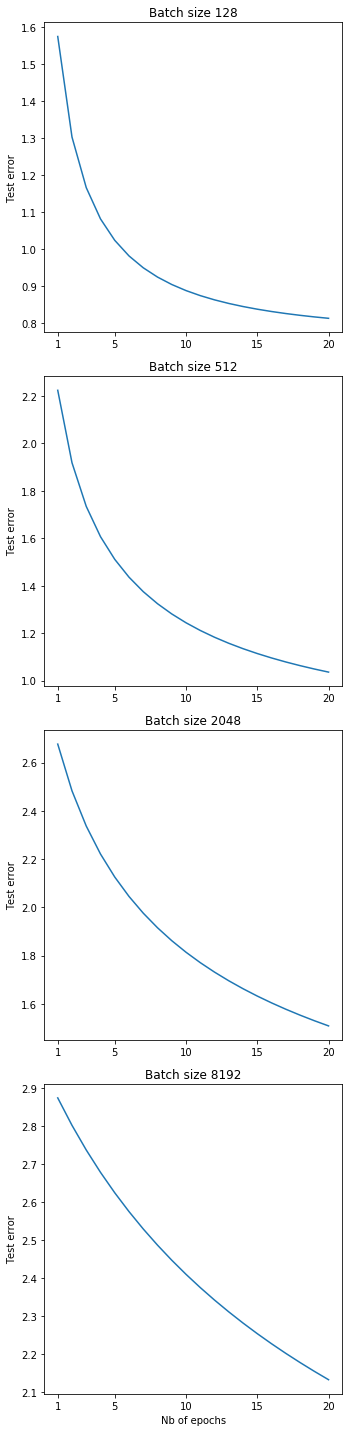

In [85]:
fig, ax = plt.subplots(len(batch_sizes),1,figsize=(5,20))
i=0
for res,bs in zip(batch_results,batch_sizes):
    ax[i].plot(range(len(res[0])),res[0])
    ax[i].set_ylabel("Test error")
    ax[i].set_xticks([0] + list(range(4,len(res[0])+1,5)))
    ax[i].set_xticklabels([1] + list(range(5,len(res[0])+1,5)))
    ax[i].set_title("Batch size "+str(bs))
    i+=1
plt.xlabel("Nb of epochs")
plt.tight_layout()
plt.savefig("../figures/user_dot_bsize_results.pdf")
plt.show()

## Learning rate

In [36]:
learning_rates = [ 0.9, 0.8, 0.75, 0.5, 0.25, 0.1 ]

lr_results = []
for lr in tqdm_notebook(learning_rates):
    print("LEARNING RATE", lr)
    print("-"*15)
    model = Dot_Embedding(nb_users)
    lr_results.append(train_model(model, nb_epochs=25, mini_batch_size=512, learning_rate=lr))
    with open("../models/user_dot_lr_"+str(lr)+".m", "wb") as f:
        torch.save(model, f)
    print("="*30)

LEARNING RATE 0.75
---------------



  Epoch   1 : loss = 15537.16185927 | training error = 1.856255456194613 | validation error = 2.2247203506800948


  Epoch   2 : loss = 7772.72338170 | training error = 1.4689097204443633 | validation error = 1.919883568486297


  Epoch   3 : loss = 5265.61180758 | training error = 1.2546790796549416 | validation error = 1.7364873081013066


  Epoch   4 : loss = 3989.39109591 | training error = 1.1128776036426677 | validation error = 1.6092863210008843


  Epoch   5 : loss = 3208.73349316 | training error = 1.009648248476514 | validation error = 1.5140198620791125


  Epoch   6 : loss = 2679.73742276 | training error = 0.929961090393771 | validation error = 1.439124448873627


  Epoch   7 : loss = 2296.99533615 | training error = 0.8659607823080828 | validation error = 1.378233771754731


  Epoch   8 : loss = 2007.13437691 | training error = 0.8130716891798373 | validation error = 1.3274922364708477


  Epoch   9 : loss = 1780.09103972 | training error = 0.7684144944715271 | validation error = 1.2844001006753778


  Epoch  10 : loss = 1597.57866010 | training error = 0.730069404981543 | validation error = 1.247251245797498


  Epoch  11 : loss = 1447.80784879 | training error = 0.6966975216769344 | validation error = 1.2148334283380189


  Epoch  12 : loss = 1322.82321934 | training error = 0.6673308787894661 | validation error = 1.1862569673193994


  Epoch  13 : loss = 1217.05551523 | training error = 0.6412487841336347 | validation error = 1.160851262243643


  Epoch  14 : loss = 1126.48598611 | training error = 0.617901340007065 | validation error = 1.1380994321478608


  Epoch  15 : loss = 1048.14027165 | training error = 0.5968601853496149 | validation error = 1.1175954361793978


  Epoch  16 : loss = 979.76890867 | training error = 0.5777856648106925 | validation error = 1.0990150576225222


  Epoch  17 : loss = 919.63888270 | training error = 0.5604043004002691 | validation error = 1.082095713203859


  Epoch  18 : loss = 866.39325673 | training error = 0.5444929332819589 | validation error = 1.0666220708467418


  Epoch  19 : loss = 818.95446451 | training error = 0.529867309112009 | validation error = 1.0524155941730449


  Epoch  20 : loss = 776.45597604 | training error = 0.5163737060235998 | validation error = 1.0393268023910465


  Epoch  21 : loss = 738.19316647 | training error = 0.5038826778437887 | validation error = 1.0272294362348178


  Epoch  22 : loss = 703.58730489 | training error = 0.49228431045097915 | validation error = 1.0160160052009377


  Epoch  23 : loss = 672.15874230 | training error = 0.4814845745021608 | validation error = 1.00559434428497


  Epoch  24 : loss = 643.50672961 | training error = 0.4714024805212944 | validation error = 0.9958849104204944


  Epoch  25 : loss = 617.29386123 | training error = 0.46196784134157615 | validation error = 0.986818647175015

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type Dot_Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "



LEARNING RATE 0.5
---------------


  Epoch   1 : loss = 17423.48252249 | training error = 2.08265042088632 | validation error = 2.385576936532379


  Epoch   2 : loss = 10011.02947307 | training error = 1.6992618113169293 | validation error = 2.1025398424090143


  Epoch   3 : loss = 7093.36733836 | training error = 1.4730899408093643 | validation error = 1.9210921485791286


  Epoch   4 : loss = 5507.48052561 | training error = 1.3189647262002324 | validation error = 1.7906323048805017


  Epoch   5 : loss = 4504.21877819 | training error = 1.2048884434659932 | validation error = 1.6904589695916195


  Epoch   6 : loss = 3809.52196249 | training error = 1.1158208986221372 | validation error = 1.6101745387504984


  Epoch   7 : loss = 3298.73239361 | training error = 1.0436440543180168 | validation error = 1.543856481553289


  Epoch   8 : loss = 2906.77274497 | training error = 0.9835367153026228 | validation error = 1.48782883072525


  Epoch   9 : loss = 2596.23846760 | training error = 0.9324272819020957 | validation error = 1.4396628185039113


  Epoch  10 : loss = 2344.04495642 | training error = 0.8882506994645113 | validation error = 1.3976754461330234


  Epoch  11 : loss = 2135.14200113 | training error = 0.8495584101530098 | validation error = 1.3606558520486918


  Epoch  12 : loss = 1959.28146038 | training error = 0.8152988118963658 | validation error = 1.327705955091661


  Epoch  13 : loss = 1809.23337725 | training error = 0.784686544603731 | validation error = 1.2981426827383316


  Epoch  14 : loss = 1679.74551618 | training error = 0.7571209779476956 | validation error = 1.2714353646298324


  Epoch  15 : loss = 1566.90668045 | training error = 0.7321333771126884 | validation error = 1.247164195061024


  Epoch  16 : loss = 1467.74227374 | training error = 0.709351515014994 | validation error = 1.2249918377405102


  Epoch  17 : loss = 1379.94835149 | training error = 0.688475287087621 | validation error = 1.2046434928186727


  Epoch  18 : loss = 1301.71176401 | training error = 0.66925950158359 | validation error = 1.1858925887315894


  Epoch  19 : loss = 1231.58556238 | training error = 0.651501458930118 | validation error = 1.168550321827828


  Epoch  20 : loss = 1168.40044977 | training error = 0.6350318238805216 | validation error = 1.152457840893853


  Epoch  21 : loss = 1111.20115806 | training error = 0.6197078005670639 | validation error = 1.1374803570041128


  Epoch  22 : loss = 1059.19932206 | training error = 0.605407950185086 | validation error = 1.1235025988181015


  Epoch  23 : loss = 1011.73848733 | training error = 0.5920282060667938 | validation error = 1.1104252992493895


  Epoch  24 : loss = 968.26760834 | training error = 0.5794787659254299 | validation error = 1.098162419704162


  Epoch  25 : loss = 928.32058968 | training error = 0.5676816437701288 | validation error = 1.0866389537253387
LEARNING RATE 0.25
---------------


  Epoch   1 : loss = 20134.03517723 | training error = 2.410793765651386 | validation error = 2.6110612234972


  Epoch   2 : loss = 14096.26126361 | training error = 2.0821962346296745 | validation error = 2.3888200878676975


  Epoch   3 : loss = 10890.72784829 | training error = 1.861181739202238 | validation error = 2.2290225125292586


  Epoch   4 : loss = 8890.25002557 | training error = 1.699331786296631 | validation error = 2.105972641900637


  Epoch   5 : loss = 7519.39995509 | training error = 1.5741163435456513 | validation error = 2.0069335789244205


  Epoch   6 : loss = 6519.53732118 | training error = 1.473414854246569 | validation error = 1.9247048399683984


  Epoch   7 : loss = 5756.82631040 | training error = 1.3900574814329216 | validation error = 1.8548423167425385


  Epoch   8 : loss = 5155.02656779 | training error = 1.319502638713577 | validation error = 1.7944226179849678


  Epoch   9 : loss = 4667.51751065 | training error = 1.2587190639860324 | validation error = 1.7414267536029393


  Epoch  10 : loss = 4264.18276934 | training error = 1.2055976174645024 | validation error = 1.6944056072146831


  Epoch  11 : loss = 3924.69360013 | training error = 1.1586200088816716 | validation error = 1.6522861040224


  Epoch  12 : loss = 3634.82453153 | training error = 1.1166618240006274 | validation error = 1.614252816316243


  Epoch  13 : loss = 3384.31699706 | training error = 1.0788700977790955 | validation error = 1.579672514497718


  Epoch  14 : loss = 3165.58184320 | training error = 1.0445843011743605 | validation error = 1.5480442630913287


  Epoch  15 : loss = 2972.88041145 | training error = 1.0132837101130168 | validation error = 1.518965410209795


  Epoch  16 : loss = 2801.79029640 | training error = 0.9845513551827524 | validation error = 1.4921077843884516


  Epoch  17 : loss = 2648.84632186 | training error = 0.9580487230835044 | validation error = 1.467200632069749


  Epoch  18 : loss = 2511.29343492 | training error = 0.9334976267781157 | validation error = 1.4440181462121042


  Epoch  19 : loss = 2386.91248250 | training error = 0.910666949127747 | validation error = 1.4223701784463347


  Epoch  20 : loss = 2273.89518389 | training error = 0.8893627981634351 | validation error = 1.402095228034865


  Epoch  21 : loss = 2170.75252980 | training error = 0.8694210712230726 | validation error = 1.3830550372129182


  Epoch  22 : loss = 2076.24697679 | training error = 0.8507017665021077 | validation error = 1.3651304166189582


  Epoch  23 : loss = 1989.34100688 | training error = 0.8330845731598812 | validation error = 1.348217950088257


  Epoch  24 : loss = 1909.15813247 | training error = 0.8164654135356026 | validation error = 1.3322273660577335


  Epoch  25 : loss = 1834.95256037 | training error = 0.8007537040729622 | validation error = 1.3170794489933806
LEARNING RATE 0.1
---------------


  Epoch   1 : loss = 22628.22120905 | training error = 2.7100220858289523 | validation error = 2.797012793602513


  Epoch   2 : loss = 18953.64414883 | training error = 2.501042998612559 | validation error = 2.666975744369926


  Epoch   3 : loss = 16334.04412365 | training error = 2.335221662408305 | validation error = 2.5593939350138033


  Epoch   4 : loss = 14363.26396990 | training error = 2.199228010926722 | validation error = 2.4680235059648683


  Epoch   5 : loss = 12824.01524806 | training error = 2.0849826349134495 | validation error = 2.388919191854494


  Epoch   6 : loss = 11587.44764256 | training error = 1.9872089754558404 | validation error = 2.3194069532469483


  Epoch   7 : loss = 10571.74678767 | training error = 1.902277008390736 | validation error = 2.2575875067118982


  Epoch   8 : loss = 9722.28422570 | training error = 1.827589751712073 | validation error = 2.202063785028068


  Epoch   9 : loss = 9001.12486887 | training error = 1.7612310064876175 | validation error = 2.1517791669677724


  Epoch  10 : loss = 8381.07819402 | training error = 1.7017508961997891 | validation error = 2.1059160774064694


  Epoch  11 : loss = 7842.13753229 | training error = 1.6480291463021433 | validation error = 2.063829648439557


  Epoch  12 : loss = 7369.25079262 | training error = 1.599184595227398 | validation error = 2.0250028126242703


  Epoch  13 : loss = 6950.87642956 | training error = 1.5545134375402847 | validation error = 1.989015039524269


  Epoch  14 : loss = 6578.01544690 | training error = 1.513445933143054 | validation error = 1.9555200255289777


  Epoch  15 : loss = 6243.54944015 | training error = 1.4755153686314453 | validation error = 1.924229419886167


  Epoch  16 : loss = 5941.77322245 | training error = 1.440335378064627 | validation error = 1.8949007581398047


  Epoch  17 : loss = 5668.06152371 | training error = 1.4075830586227596 | validation error = 1.8673283485002594


  Epoch  18 : loss = 5418.62490886 | training error = 1.3769862294433948 | validation error = 1.8413362940947176


  Epoch  19 : loss = 5190.32934818 | training error = 1.3483136662656698 | validation error = 1.8167730918123361


  Epoch  20 : loss = 4980.56046760 | training error = 1.3213675385234718 | validation error = 1.7935073814963742


  Epoch  21 : loss = 4787.12024248 | training error = 1.2959774750683912 | validation error = 1.7714245674972293


  Epoch  22 : loss = 4608.14686084 | training error = 1.2719958641500138 | validation error = 1.7504241364016337


  Epoch  23 : loss = 4442.05317727 | training error = 1.2492940980455407 | validation error = 1.7304174615332935


  Epoch  24 : loss = 4287.47777373 | training error = 1.227759552976264 | validation error = 1.7113260335316731


  Epoch  25 : loss = 4143.24555829 | training error = 1.207293117331319 | validation error = 1.6930799977720166



In [45]:
with open("../results/user_dot_lr_results.pkl", "wb") as f:
    pickle.dump((learning_rates, lr_results),f)

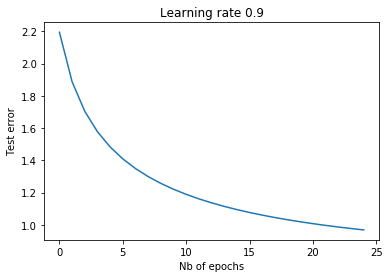

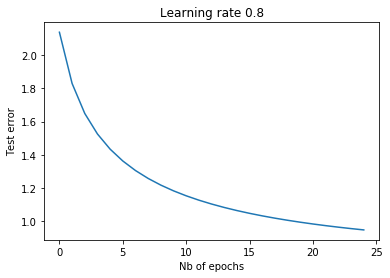

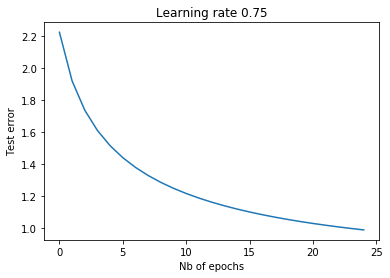

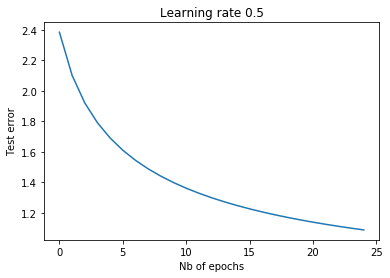

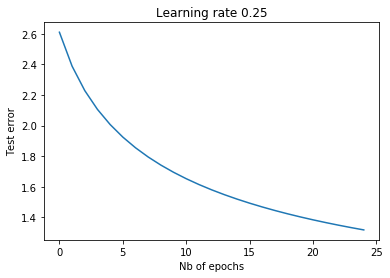

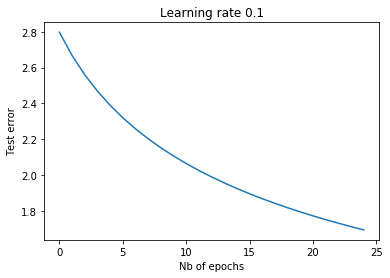

In [44]:
fig, ax = plt.subplots(len(learning_rates),1,figsize=(5,20))
i=0
for res,lr in zip(lr_results,learning_rates):
    ax[i].plot(range(len(res[0])),res[0])
    ax[i].set_ylabel("Test error")
    ax[i].set_xticks([0] + list(range(4,len(res[0])+1,5)))
    ax[i].set_xticklabels([1] + list(range(5,len(res[0])+1,5)))
    ax[i].set_title("Learning rate "+str(lr))
    i+=1
plt.xlabel("Nb of epochs")
plt.tight_layout()
plt.savefig("../figures/user_dot_lr_results.pdf")
plt.show()